# vgsales.csv 데이터 전처리하기

mkdir -p ~/aiffel/data_preprocess/<br>
ln -s ~/data/ ~/aiffel/data_preprocess/<br>
데이터 준비

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# dataframe 만들기
csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/vgsales.csv'
vgsales = pd.read_csv(csv_file_path) 
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 결측치 확인

In [69]:
# 전체 데이터 건수
print('전체 데이터 건수:', len(vgsales))

전체 데이터 건수: 16598


In [70]:
print('컬럼별 결측치 개수')
len(vgsales) - vgsales.count()

컬럼별 결측치 개수


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [71]:
vgsales[vgsales.duplicated()]

# 중복된 데이터는 없음

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


### 연도를 기준으로 정렬

In [72]:
vgsales = vgsales.sort_values('Year')
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


In [73]:
# 결측치가 발견된 Year, Publisher 항목을 기준으로 Nan 값이 존재하는 행만 삭제
# drop은 원본 파일 변경되지 않는다
vgsales.dropna(subset=['Year', 'Publisher'])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.00,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
4820,4822,EA Sports UFC 2,XOne,2016.0,Sports,Electronic Arts,0.23,0.14,0.00,0.04,0.40
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03


In [74]:
# 연도 파악

vg_year = vgsales['Year']
vg_year

6896     1980.0
2669     1980.0
5366     1980.0
1969     1980.0
1766     1980.0
          ...  
16307       NaN
16327       NaN
16366       NaN
16427       NaN
16493       NaN
Name: Year, Length: 16598, dtype: float64

In [75]:
# 평균 년도: 2006
vg_year.mean()

2006.4064433147546

In [76]:
# 가장 오래된 년도: 1980년
vg_year.min()

1980.0

In [77]:
# 가장 최근 년도: 2020년
vg_year.max()

2020.0

### Rank를 기준으로 정렬

In [78]:
# Rank 1~100위 데이터만 추출
vg_rank = vgsales[vgsales['Rank'] <= 100]
vg_rank

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
...,...,...,...,...,...,...,...,...,...,...,...
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67


### NA_Sales(national sales) 항목의 이상치를 찾아보자! : z-score method

In [79]:
# 이상치 찾기: z-score method
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [80]:
vg_rank.loc[outlier(vg_rank, 'NA_Sales', 1.5)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [81]:
vg_rank.loc[outlier(vg_rank, 'NA_Sales', 2)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [82]:
vg_rank.loc[outlier(vg_rank, 'NA_Sales', 3)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


### NA_Sales(national sales) 항목의 이상치를 찾아보자! : IQR

In [83]:
# 이상치 찾기: IQR
def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1-1.5*iqr)|(df[col] > q3+1.5*iqr)]

vg_rank_outlier = outlier2(vg_rank, 'NA_Sales')
vg_rank_outlier

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


In [84]:
# 이상치 제거한 데이터
vg_rank_drop = vg_rank.drop(vg_rank_outlier.index)
vg_rank_drop

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
...,...,...,...,...,...,...,...,...,...,...,...
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67


### 정규화를 해보자! : min-max scaling

In [85]:
cols = ["NA_Sales"]

In [86]:
# NA_Sales 데이터를 min-max scaling 기법으로 정규화
# 데이터에서 최솟값을 빼주고, '최댓값-최솟값'으로 나눠준다
vg_rank_drop[cols] = (vg_rank_drop[cols]-vg_rank_drop[cols].min())/(vg_rank_drop[cols].max()-vg_rank_drop[cols].min())
vg_rank_drop.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,0.462895,0.45,0.00,0.08,7.81
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,0.628949,3.44,3.84,0.46,17.28
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,0.324026,1.18,0.70,0.19,7.46
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,0.723733,2.71,4.18,0.42,18.14
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,0.867010,3.75,3.54,0.55,20.61


In [87]:
# Min-Max Scaling 결과
# NA_Sales 컬럼의 최솟값(min)은 0이고, 최댓값(max)은 1임을 확인
vg_rank_drop.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,53.849462,2005.537634,0.352824,3.831613,1.959462,1.220968,12.793441
std,27.236862,7.309254,0.205850,2.218901,2.014747,1.400305,5.610246
min,5.000000,1982.000000,0.000000,0.010000,0.000000,0.080000,7.340000
25%,31.000000,2001.000000,0.207201,2.320000,0.140000,0.550000,8.760000
50%,54.000000,2007.000000,0.335048,3.300000,1.450000,0.850000,10.790000
75%,77.000000,2011.000000,0.441587,4.880000,3.120000,1.380000,14.640000
max,100.000000,2015.000000,1.000000,11.000000,10.220000,10.570000,31.370000


### 구간화(binning)

<AxesSubplot:>

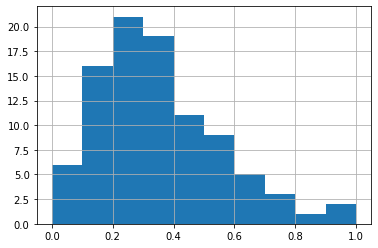

In [88]:
vg_rank_drop["NA_Sales"].hist()

In [96]:
# 6개 구간으로 균등하게 나눈다, 데이터의 최솟값에서 최댓값을
ctg = pd.cut(vg_rank_drop["NA_Sales"], bins = 6)
ctg

89       (0.333, 0.5]
22       (0.5, 0.667]
96     (0.167, 0.333]
21     (0.667, 0.833]
18       (0.833, 1.0]
           ...       
93    (-0.001, 0.167]
97    (-0.001, 0.167]
77    (-0.001, 0.167]
92    (-0.001, 0.167]
33       (0.333, 0.5]
Name: NA_Sales, Length: 93, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 0.167] < (0.167, 0.333] < (0.333, 0.5] < (0.5, 0.667] < (0.667, 0.833] < (0.833, 1.0]]

In [97]:
ctg.value_counts().sort_index()

(-0.001, 0.167]    18
(0.167, 0.333]     28
(0.333, 0.5]       27
(0.5, 0.667]       14
(0.667, 0.833]      3
(0.833, 1.0]        3
Name: NA_Sales, dtype: int64

<AxesSubplot:>

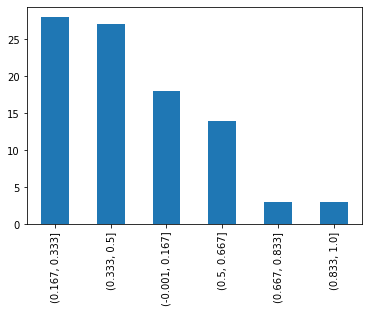

In [98]:
ctg.value_counts().plot(kind='bar')

In [99]:
# qcut은 구간을 일정하게 나누는 것이 아니라 데이터의 분포를 비슷한 크기의 그룹으로 나눠준다
ctg = pd.qcut(vg_rank_drop["NA_Sales"], q = 5)
ctg

89     (0.368, 0.526]
22       (0.526, 1.0]
96     (0.278, 0.368]
21       (0.526, 1.0]
18       (0.526, 1.0]
           ...       
93    (-0.001, 0.184]
97    (-0.001, 0.184]
77    (-0.001, 0.184]
92    (-0.001, 0.184]
33     (0.278, 0.368]
Name: NA_Sales, Length: 93, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 0.184] < (0.184, 0.278] < (0.278, 0.368] < (0.368, 0.526] < (0.526, 1.0]]

In [100]:
ctg.value_counts().sort_index()

(-0.001, 0.184]    19
(0.184, 0.278]     18
(0.278, 0.368]     19
(0.368, 0.526]     18
(0.526, 1.0]       19
Name: NA_Sales, dtype: int64

<AxesSubplot:>

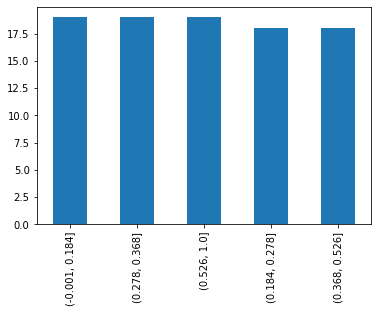

In [101]:
ctg.value_counts().plot(kind='bar')